# Get and explore dataset

In [1]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import numpy as np
import re
import statistics

In [2]:
# Make results reproducible - set random seed
from numpy.random import seed
seed(42)

In [3]:
negative_file = "negative.txt"
positive_file = "positive.txt"

In [13]:
# Do not modify - helper function to load and preprocess data
def filter_words(line):    
    line = re.sub(r'[^\w\s]','',line.rstrip())
    words = line.split(" ") 
    words = [i.lower() for i in words if i]      
    return " ".join(words)

def load_data(filename):
    thefile = open(filename, 'r') 
    lines = thefile.readlines() 

    data = []
    for l in range(0,len(lines)): 
        if(lines[l-1].strip() == "<title>"): 
            theline = filter_words(lines[l])
            if(len(theline) < 50):
                data.append(theline)            
            
    return data

# Helper function to convert categorical data to class label
def to_word_label(y):
    y = to_class(y)   
    return ["positive" if i==0 else "negative" for i in y]

# Helper function to convert class label to numeric label
def to_numeric_label(y):
  return [0 if i=="positive" else 1 for i in word_labels]

# Helper function: this function needs to be called before sending arrays to sklearn metrics,
# it converts back to class form from categorical form. ie: [1,0] --> 0, [0,1] --> 1
def to_class(y):
    return np.argmax(y,axis=1) 

In [14]:
positive = load_data(positive_file)
negative = load_data(negative_file)

print("The first ten positive reviews.\n")
print(positive[0:10])
print()
print("The first the negative reviews.\n")
print(negative[0:10])

The first ten positive reviews.

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book', 'to the point and beautifully illustrated', 'at least somebody has got it', 'beautifully written heartwarming story', 'an excellent cookbook full of delicious recipes', 'an outstanding resource']

The first the negative reviews.

['horrible book horrible', 'shallow selfindulgence', 'horrible book horrible', 'disappointment', 'a disappointing mess', 'save your money there are better books out there', 'thank you but no thanks', 'unendurable', 'the hard way', 'some good info among the political commercial']


In [15]:
# Do not modify - Combines the positive and negative reviews into a single list and create labels
data = positive + negative
word_labels = ["positive"] * len(positive) + ["negative"] * len(negative) 

# Converts labels to numbers in one-hot encoding - [1, 0] (positive) or [0, 1] (negative)
from keras.utils import to_categorical
labels  = to_categorical(to_numeric_label(word_labels))

The means of the reviews 0.486 for the positive reviews and 0.514 for the negative reviews, [0.48633575 0.51366425]
The starndard deviation of the dataset is 0.499 for the dataset,[0.49980882 0.49980882]



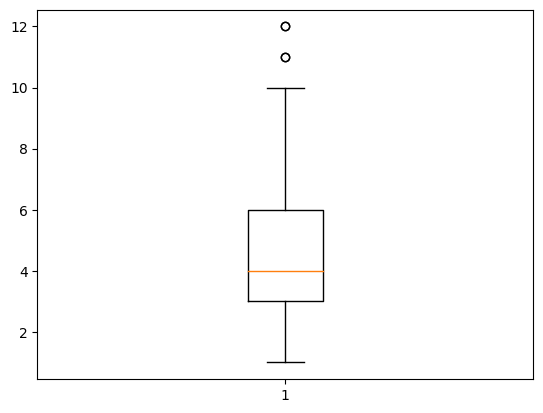

Unique words: 2559
Mean number of words is 4.34 with standard deviation (2.169676)
The total number of reviews is 1793
The number of postive reviews is : 872 
The number of negative reviews is: 921


In [31]:
# Write some code to investigate the dataset. 
# - Calculate and report the mean review size, its standard deviation and create a boxplot.
mean = np.mean(labels, axis = 0)
stdv = np.std(labels, axis = 0)
print(f'The means of the reviews 0.486 for the positive reviews and 0.514 for the negative reviews, {mean}')
print(f'The starndard deviation of the dataset is 0.499 for the dataset,{stdv}')
print()
reviews = [len(x.split()) for x in data]
maxlen = round(np.mean(reviews))
plt.boxplot(reviews)
plt.show()
# - Calculate the number of unique words in the dataset
text = ' '.join([str(item) for item in data])
words = text.split()
unique = list(set(words)) 
print(f'Unique words: {len(unique)}')
print(f'Mean number of words is %.2f with standard deviation (%f)' %(np.mean(reviews), np.std(reviews)))

# - Perform any other dataset investigation that you feel would be valuable
print(f'The total number of reviews is {len(word_labels)}')
print(f'The number of postive reviews is : {len(positive)} \nThe number of negative reviews is: {len(negative)}')

In [17]:
# Do not modify - Tokenize the vocabulary 
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=25)

tokenizer.fit_on_texts(data) #create the vocabularry

tokenized_data = tokenizer.texts_to_sequences(data) #tokenize the data using the vocabulary

vocab_size = len(tokenizer.word_index) + 1 

# Compare a sample of the data before and after tokenization
print(data[0:5])
print(tokenized_data[0:5])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book']
[[18, 4, 2, 19], [2, 4, 2], [], [6, 4], [1, 12, 3]]


# Pre-processing

In [18]:
import tensorflow as tf
from tensorflow import keras
# Pre-processing
# Write some code to pre-process the data so that each review is the same length
tokenized_data = tf.keras.preprocessing.sequence.pad_sequences(tokenized_data, maxlen=4)

In [19]:
# Write some code to split the data into a training and test set. Make sure you shuffle the data. Use 20% for the test set.
from sklearn.model_selection import train_test_split
X = tokenized_data
y = labels
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [20]:
# convert the data from list to numpy arrays 
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# check the shape of the X,y train and X,y test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1434, 4), (359, 4), (1434, 2), (359, 2))

In [21]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
from keras.models import Sequential
from keras import layers
embedding_dim = 100
maxlen = 4
# Fill in the following function so it
model = Sequential()
model.add(layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim, input_length = maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(2, activation = 'softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics =['accuracy'])
model.summary()
# - makes a prediction for the test set given the model
# - reports the precision, recall and f1 score. Also print the confusion matrix. 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
# You will need to use the helper to_class function to convert y_pred and y_test before supplying them to the sklearn functions.

def assess_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = to_class(y_pred)
    y_test = to_class(y_test)
    
    print(classification_report(y_test, y_pred))
    print('--Confusion Matrix--')
    print(confusion_matrix(y_test, y_pred))
    
def eval(model, X_train, y_train):
    loss, acc = model.evaluate(X_train, y_train, verbose = 0)
    print('Train Accuracy :%f' %(acc*100))
    

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4, 100)            256000    
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 802       
                                                                 
Total params: 256,802
Trainable params: 256,802
Non-trainable params: 0
_________________________________________________________________


# Build and tune model

Define network architecture

In [22]:
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
from keras.models import Sequential
from keras import layers
from keras.layers import Dropout, LSTM
embedding_dim = 100
maxlen = 4
time_stamp = 10
model_1 = Sequential()
#Embbeding layers
model_1.add(layers.Embedding(input_dim=vocab_size,input_length = maxlen, output_dim = embedding_dim))
model_1.add(layers.SimpleRNN(10,activation = 'sigmoid', return_sequences = True))
model_1.add(Dropout(0.2))
model_1.add(layers.SimpleRNN(10,activation = 'sigmoid', return_sequences = True))
model_1.add(layers.LSTM(15,dropout=0.5))
model_1.add(layers.Dense(2, activation = 'sigmoid'))
model_1.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 4, 100)            256000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 4, 10)             1110      
                                                                 
 dropout (Dropout)           (None, 4, 10)             0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 4, 10)             210       
                                                                 
 lstm (LSTM)                 (None, 15)                1560      
                                                                 
 dense_2 (Dense)             (None, 2)                 32        
                                                                 
Total params: 258,912
Trainable params: 258,912
Non-tr

Train model

In [231]:
# train the model and store, each run on a vaariable called history which we will use to plot the loss and accuracy
history = model_1.fit(X_train, y_train, batch_size = 10, epochs = 10, validation_split=(0.2))
trainPredict = model_1.predict(X_train)
testPredict = model_1.predict(X_test)

Epoch 1/10
115/115 [==============================] - 9s 21ms/step - loss: 0.6924 - accuracy: 0.5283 - val_loss: 0.6943 - val_accuracy: 0.5017
Epoch 2/10
115/115 [==============================] - 1s 12ms/step - loss: 0.6950 - accuracy: 0.5126 - val_loss: 0.6932 - val_accuracy: 0.5017
Epoch 3/10
115/115 [==============================] - 1s 10ms/step - loss: 0.6932 - accuracy: 0.5074 - val_loss: 0.6951 - val_accuracy: 0.5017
Epoch 4/10
115/115 [==============================] - 1s 10ms/step - loss: 0.6923 - accuracy: 0.5170 - val_loss: 0.6940 - val_accuracy: 0.5017
Epoch 5/10
115/115 [==============================] - 2s 14ms/step - loss: 0.6912 - accuracy: 0.5161 - val_loss: 0.6909 - val_accuracy: 0.5401
Epoch 6/10
115/115 [==============================] - 1s 10ms/step - loss: 0.6899 - accuracy: 0.5344 - val_loss: 0.6893 - val_accuracy: 0.5679
Epoch 7/10
115/115 [==============================] - 1s 10ms/step - loss: 0.6872 - accuracy: 0.5466 - val_loss: 0.6920 - val_accuracy: 0.5017

Examine performance of model

In [24]:
# assess the performance of the function
print('---Assessment of the first model---')
print(assess_model(model, X_test,y_test))
print(eval(model, X_train, y_train))
print()
print('---Assessment of the second model---')
print(assess_model(model_1, X_test,y_test))
print(eval(model_1, X_train, y_train))

# the reports below shows that the model perform similarly in the this data set
# they both have an accuracy of around 50%.

---Assessment of the first model---
12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.50      0.13      0.21       178
           1       0.50      0.87      0.64       181

    accuracy                           0.50       359
   macro avg       0.50      0.50      0.43       359
weighted avg       0.50      0.50      0.43       359

--Confusion Matrix--
[[ 24 154]
 [ 24 157]]
None
Train Accuracy :51.464432
None

---Assessment of the second model---
12/12 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       178
           1       0.50      1.00      0.67       181

    accuracy                           0.50       359
   macro avg       0.25      0.50      0.34       359
weighted avg       0.25      0.50      0.34       359

--Confusion Matrix--
[[  0 178]
 [  0 181]]
None


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Train Accuracy :51.603907
None


Plot graphs for accuracy and loss

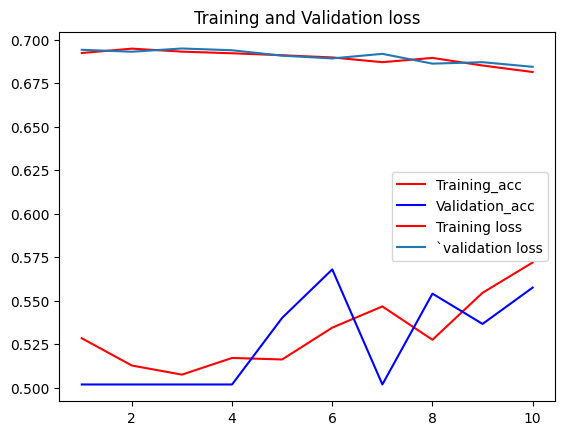

In [252]:
# This function plots the loss and the accuracy of the models
def plot(history):
    acc = history.history['accuracy']
    val_acc =history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epoch = range(1, len(acc) + 1)
    ## accuracy plot
    plt.plot(epoch, acc, 'red', label = 'Training_acc')
    plt.plot(epoch, val_acc, 'b', label = 'Validation_acc')
    plt.title('Training and Validation accuracy')
    plt.legend()
    plt.figure
    
    plt.plot(epoch, loss, 'red', label = 'Training loss')
    plt.plot(epoch, val_loss, label = '`validation loss')
    plt.title('Training and Validation loss')
    plt.legend()
    
plot(history)

# Make a prediction

In [245]:
from keras_preprocessing.sequence import pad_sequences
# This is a very small set of completed new data to use to make predictions.
prediction_data = ["this book is fabulous","i hated this book", "the best", "no good", "okay"]
tokenized = tokenizer.texts_to_sequences(prediction_data)
padded = pad_sequences(tokenized, padding='post', maxlen=maxlen)

# Supply this data to each of your models and see how it does. 
# You can call the helper function "to_word_label" to map the output of the model to the name of the
# class it was predicted to belong to.
print('Prediction of the first model')
sentiment = ['Negative', 'Positive']
sequence =  tokenizer.texts_to_sequences(prediction_data)
test = pad_sequences(tokenized, padding='post', maxlen=maxlen)
sentiment[np.around(model.predict(test), decimals = 0).argmax(axis =1)[1]]

print('Prediction of the second model')
sentiment = ['Negative', 'Positive']
sequence =  tokenizer.texts_to_sequences(prediction_data)
test = pad_sequences(tokenized, padding='post', maxlen=maxlen)
sentiment[np.around(model_1.predict(test), decimals = 0).argmax(axis =1)[1]]


Prediction of the first model
1/1 [==============================] - 0s 28ms/step
Prediction of the second model
1/1 [==============================] - 0s 30ms/step


'Negative'